# Probability Distribution Exercises

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## For the following problems, use python to simulate the problem and calculate an experimental probability, then compare that to the theoretical probability.

### 1. A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.

In [2]:
window_distribution = stats.poisson(2)

Text(0, 0.5, 'P(X = x)')

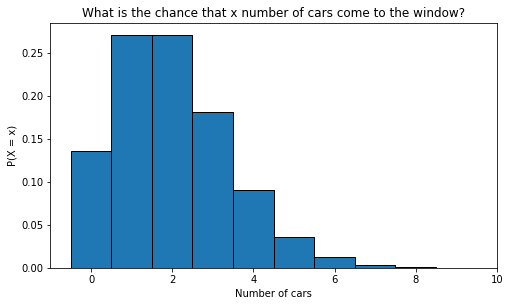

In [3]:
plt.figure(figsize=(8, 4.5))
x = np.arange(0, 10)
y = window_distribution.pmf(x)

plt.bar(x, y, ec='black', width=1)
plt.title("What is the chance that x number of cars come to the window?")
plt.xlabel("Number of cars")
plt.ylabel("P(X = x)")

#### What is the probability that no cars drive up in the noon hour?

##### Experimental Answer

In [4]:
n_sims = 10_000

(window_distribution.rvs(n_sims) == 0).mean()

0.1415

##### Theoretical Answer

In [5]:
window_distribution.pmf(0)

0.1353352832366127

#### What is the probability that 3 or more cars come through the drive through?

##### Experimental Answer

In [6]:
(window_distribution.rvs(n_sims) >= 3).mean()

0.3283

##### Theoretical Answer

In [7]:
window_distribution.pmf(3) + window_distribution.sf(3)

0.3233235838169365

In [8]:
window_distribution.sf(2)

0.32332358381693654

#### How likely is it that the drive through gets at least 1 car?

##### Experimental Answer

In [9]:
(window_distribution.rvs(n_sims) >= 1).mean()

0.8635

##### Theoretical Answer

In [10]:
window_distribution.sf(0)

0.8646647167633873

### Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:

In [11]:
grades_distribution = stats.norm(3.0, 0.3)

#### What grade point average is required to be in the top 5% of the graduating class?

##### Experimental Answer

In [12]:
grades_sim = grades_distribution.rvs(n_sims)
np.percentile(grades_sim, 95)

3.497885022257177

##### Theoretical Answer

In [13]:
grades_distribution.isf(.05)

3.4934560880854417

#### What GPA constitutes the bottom 15% of the class?

##### Experimental answer

In [14]:
np.percentile(grades_sim, 15)

2.68812736015766

##### Theoretical Answer

In [15]:
grades_distribution.ppf(.15)

2.689069983151863

#### An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?

##### Experimental Answer

In [16]:
np.percentile(grades_sim, 30)

2.845415240904245

##### Theorectical Answer

In [17]:
grades_distribution.ppf(.30)

2.842679846187588

A student with a 2.8 grade point average would qualify

#### If I have a GPA of 3.5, what percentile am I in?

##### Experimental Answer

In [18]:
(grades_sim > 3.5).mean()

0.0495

##### Theoretical Answer

In [19]:
grades_distribution.sf(3.5)

0.0477903522728147

### A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?

In [20]:
website_distribution = stats.binom(4326, .02)

#### Experimental Answer

In [21]:
website_sim = website_distribution.rvs(n_sims)
website_sim

array([ 88,  88, 113, ..., 108,  92,  75])

In [22]:
(website_sim >= 97).mean()

0.144

#### Theoretical Answer

In [23]:
website_distribution.pmf(97) + website_distribution.sf(97)

0.13975823631333503

### You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question.

#### What is the probability that at least one of your first 60 answers is correct?

In [24]:
answer_distribution = stats.binom(60, .01)

##### Experimental Answer

In [25]:
(answer_distribution.rvs(n_sims) >= 1).mean()

0.457

##### Theoretical Answer

In [26]:
answer_distribution.pmf(1) + answer_distribution.sf(1)

0.4528433576092542

### The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. How likely is it that the break area gets cleaned up each day?

In [27]:
student_distribution = stats.binom(66, .9)

average_students = int(student_distribution.rvs(n_sims).mean().round())

cleaning_distribution = stats.binom(average_students, .03)

##### Experimental answer

In [28]:
(cleaning_distribution.rvs(n_sims) >= 1).mean()

0.8347

##### Theoretical Answer

In [29]:
prob_of_clean_each_day = cleaning_distribution.pmf(1) + cleaning_distribution.sf(1)
prob_of_clean_each_day

0.8342199288437275

#### How likely is it that it goes two days without getting cleaned up?

In [30]:
two_days_distribution = stats.binom(2, 1 - prob_of_clean_each_day)

##### Experimental answer

In [31]:
(two_days_distribution.rvs(n_sims) == 2).mean()

0.0268

##### Theoretical Answer

In [32]:
two_days_distribution.pmf(2)

0.027483031992578757

#### One week?

In [33]:
one_week_distribution = stats.binom(5, 1 - prob_of_clean_each_day)

##### Experimental answer

In [34]:
(one_week_distribution.rvs(n_sims) == 5).mean()

0.0002

##### Theoretical answer

In [35]:
one_week_distribution.pmf(5)

0.00012521651388094245

### You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

In [36]:
mean_people = 15
sd_people = 3

mean_wait = mean_people * 2
sd_wait = sd_people * 2

line_distribution = stats.norm(mean_wait, sd_wait)

#### Experimental Answer

In [37]:
((line_distribution.rvs(n_sims) + 12) <= 45).mean()

0.6938

#### Theoretical Answer

In [38]:
max_time_i_can_wait = 45 - 12

line_distribution.cdf(max_time_i_can_wait)

0.6914624612740131

### Connect to the employees database and find the average salary of current employees, along with the standard deviation. Model the distribution of employees salaries with a normal distribution and answer the following questions:

In [39]:
import env
url = env.get_url('employees')

In [40]:
salaries = pd.read_sql('SELECT salary FROM salaries WHERE to_date > NOW()', url)
salaries

,salary
0,88958
1,72527
2,43311
3,74057
4,94692
...,...
240119,52868
240120,69501
240121,83441
240122,55003


In [41]:
mean_salary = salaries.salary.mean()
mean_salary

72012.23585730705

In [42]:
std_salary = salaries.salary.std()
std_salary

17309.99538025198

In [43]:
salary_distribution = stats.norm(mean_salary, std_salary)

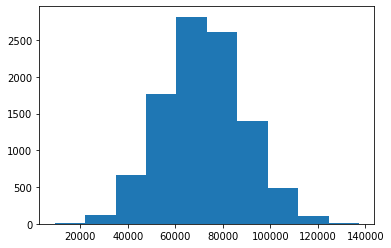

In [44]:
plt.hist(salary_distribution.rvs(10_000))
plt.show()

#### What percent of employees earn less than 60,000?

##### Experimental answer

In [71]:
ex_percent_under_60k = (salary_distribution.rvs(n_sims) < 60_000).mean() * 100
print(f'Experimentally, {ex_percent_under_60k}% make under 60k')

Experimentally, 24.51% make under 60k



##### Theoretical answer

In [72]:
percent_under_60k = salary_distribution.cdf(59999.99) * 100
print(f'Theoretically, {percent_under_60k}% make under 60k')

Theoretically, 24.38572436502896% make under 60k


#### What percent of employees earn more than 95,000?

##### Experimental answer

In [77]:
ex_percent_over_95k = (salary_distribution.rvs(n_sims) > 95_000).mean() * 100
print(f'Experimentally, {ex_percent_over_95k}% make over 95k')

Experimentally, 9.44% make over 95k


##### Theoretical answer

In [88]:
percent_over_95k = salary_distribution.sf(95000) * 100 
print(f'Theoretically, {percent_over_95k}% make over 95k')

Theoretically, 9.208819199804053% make over 95k


#### What percent of employees earn between 65,000 and 80,000?

##### Experimental Answer

In [87]:
salary_sim = salary_distribution.rvs(n_sims)
ex_percent_btwn_80k_and_60k = ((salary_sim <= 80000) & (salary_sim >= 65000)).mean() * 100
print(f'Experimentally, {ex_percent_btwn_80k_and_60k}% make between 65k and 80k')

Experimentally, 33.54% make between 65k and 80k


##### Theoretical answer

In [89]:
percent_btwn_80k_and_60k = (salary_distribution.cdf(80_000) - salary_distribution.cdf(65_000)) * 100
print(f'Theoretically, {percent_btwn_80k_and_60k}% make between 65k and 80k')

Theoretically, 33.50605685446666% make between 65k and 80k


#### What do the top 5% of employees make?

##### Experimental Answer

In [94]:
ex_top_5_percent = np.quantile(salary_sim, .95)
print(f'Experimentally, the top 5% make over ${ex_top_5_percent:,.2f}')

Experimentally, the top 5% make over $100,483.48


##### Theoretical answer

In [90]:
top_5_percent = salary_distribution.isf(.05)
print(f'Theoretically, The top 5% make over ${top_5_percent:,.2f}')

Theoretically, The top 5% make over $100,484.64
